### QUANTUM TELEPORTATION

In [3]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
import qiskit as qk
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

In [4]:
def applySecret(secret, qubit, quantCircuit, dagger):
    functionmap = {
        'x':quantCircuit.x,
        'y':quantCircuit.y,
        'z':quantCircuit.z,
        'h':quantCircuit.h,
        't':quantCircuit.t,
    }
    if dagger: functionmap['t'] = quantCircuit.tdg
    if dagger:
        [functionmap[unitary](qubit) for unitary in secret]
    else:
        [functionmap[unitary](qubit) for unitary in secret[::-1]]

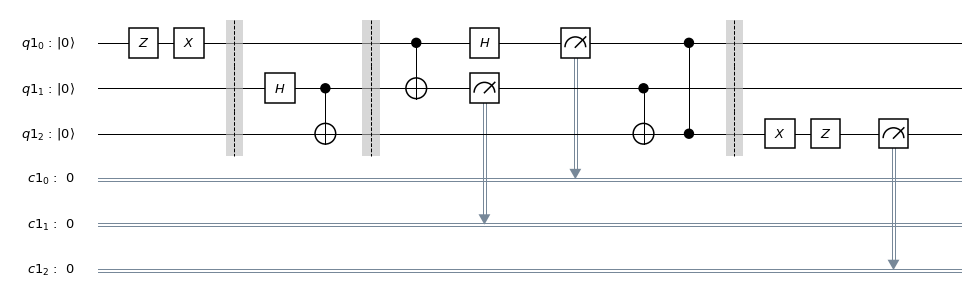

In [7]:
#creating circuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

applySecret('xz',q[0],qc,dagger=0)
qc.barrier()

#generating bell state
qc.h(q[1])
qc.cx(q[1],q[2])
qc.barrier()

#teleportation circuit
qc.cx(q[0],q[1])
qc.h(q[0])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.cx(q[1], q[2])
qc.cz(q[0], q[2])
qc.barrier()
applySecret('zx',q[2],qc,dagger=0)
qc.measure(q[2],c[2])
qc.draw(output='mpl')

{'010': 231, '000': 273, '001': 262, '011': 258}


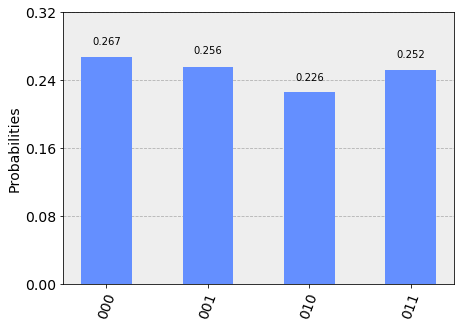

In [8]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend,shots=1024)
output = job.result()

measureOutput = output.get_counts(qc)
print(measureOutput)
plot_histogram(measureOutput)